In [1]:
import numpy as np
import matplotlib.pyplot as plt


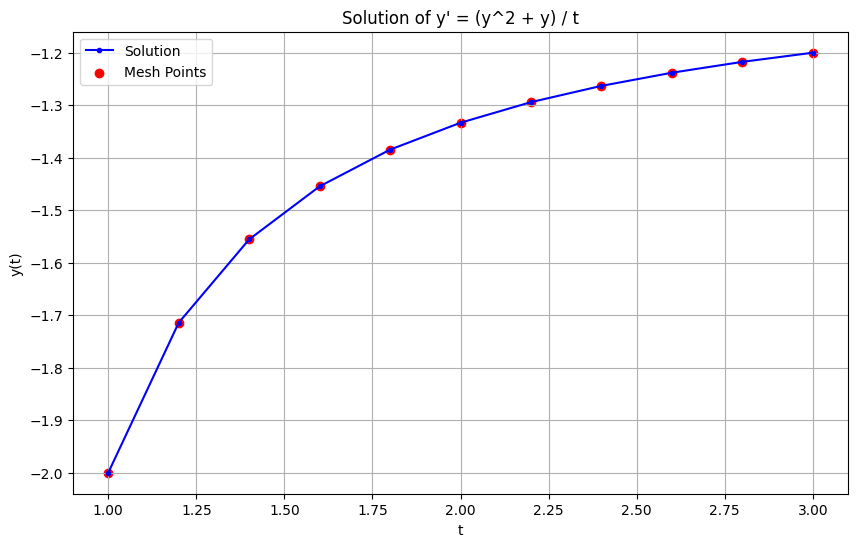

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, y):
    return (y**2 + y) / t

def rk4_step(f, t, y, h):
    k1 = h * f(t, y)
    k2 = h * f(t + 0.5 * h, y + 0.5 * k1)
    k3 = h * f(t + 0.5 * h, y + 0.5 * k2)
    k4 = h * f(t + h, y + k3)
    y_next = y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

    return y_next

def adaptive_rk4(f, t0, y0, t_end, h0, tol):
    t_values = [t0]
    y_values = [y0]
    h_values = [h0]

    t = t0
    y = y0
    h = h0

    while t < t_end:
        # Perform one full 2h step and two half h & h steps
        y_full = rk4_step(f, t, y, 2*h)
        y_half1 = rk4_step(f, t, y, h)
        y_half2 = rk4_step(f, t + h, y_half1, h)

        # Estimate the error
        error = np.abs(y_full - y_half2)

        rho = ((tol * h *30)/error)


        if rho > 1:
            t = t + 2*h
            y = y_half2
            t_values.append(t)
            y_values.append(y)
            h_values.append(h)
        else:
            h = h * (rho)**0.25

    return np.array(t_values), np.array(y_values)

# Initial conditions
t0 = 1
y0 = -2
t_end = 3
h0 = 0.1
tol = 1e-4

# Solve the equation
t_values, y_values = adaptive_rk4(f, t0, y0, t_end, h0, tol)

# Plot the solution
plt.figure(figsize=(10, 6))
plt.plot(t_values, y_values, 'b.-', label='Solution')
plt.scatter(t_values, y_values, c='r', label='Mesh Points')
plt.title('Solution of y\' = (y^2 + y) / t')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)
plt.show()
